In [1]:
import tensorflow as tf
print(tf.__version__)

2023-01-20 22:15:12.221695: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 22:15:12.221719: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
digits = pd.read_csv('train.csv')

In [4]:
X = digits.iloc[:,1:]/255
y = digits.label
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [5]:
x_train = x_train.to_numpy().reshape(28140,28,28)
x_test = x_test.to_numpy().reshape(13860,28,28)

In [6]:
x_test.shape

(13860, 28, 28)

In [7]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[28,28], name='flatten_layer'),
        tf.keras.layers.Dense(units=64, activation='elu',use_bias=True),
        tf.keras.layers.Dense(units=128, activation='elu',use_bias=True),
        #tf.keras.layers.Dense(units=64, activation='relu',use_bias=True),
        tf.keras.layers.Dense(units=64, activation='relu',use_bias=True),
        tf.keras.layers.Dense(units=10,name='output_layer')
])

2023-01-20 22:15:17.366999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 22:15:17.367211: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 22:15:17.367265: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-20 22:15:17.367313: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-20 22:15:17.369241: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

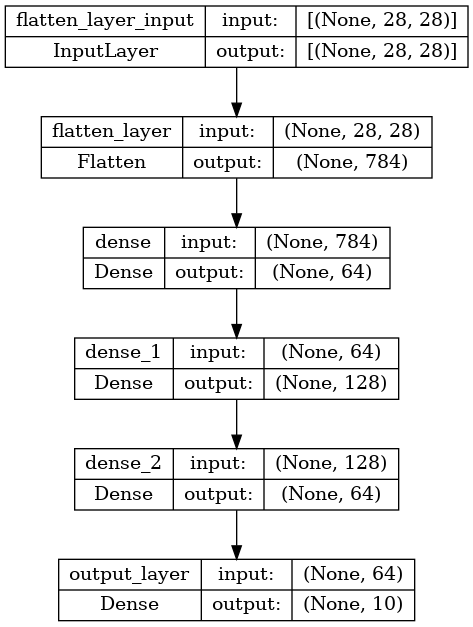

In [8]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96
)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss=loss_fn,
              optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=16, 
                    validation_data=(x_test,y_test))

Epoch 1/30


2023-01-20 22:15:17.715612: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 88247040 exceeds 10% of free system memory.


1749/1759 [============================>.] - ETA: 0s - loss: 0.3126 - accuracy: 0.9058

2023-01-20 22:15:20.994321: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 43464960 exceeds 10% of free system memory.


1759/1759 [==============================] - 4s 2ms/step - loss: 0.3119 - accuracy: 0.9061 - val_loss: 0.1855 - val_accuracy: 0.9418
Epoch 2/30
1759/1759 [==============================] - 3s 2ms/step - loss: 0.1529 - accuracy: 0.9521 - val_loss: 0.1581 - val_accuracy: 0.9536
Epoch 3/30
1759/1759 [==============================] - 3s 2ms/step - loss: 0.1111 - accuracy: 0.9650 - val_loss: 0.1439 - val_accuracy: 0.9571
Epoch 4/30
1759/1759 [==============================] - 3s 2ms/step - loss: 0.0895 - accuracy: 0.9724 - val_loss: 0.1671 - val_accuracy: 0.9455
Epoch 5/30
1759/1759 [==============================] - 3s 2ms/step - loss: 0.0750 - accuracy: 0.9752 - val_loss: 0.1610 - val_accuracy: 0.9551
Epoch 6/30
1759/1759 [==============================] - 3s 2ms/step - loss: 0.0623 - accuracy: 0.9800 - val_loss: 0.1293 - val_accuracy: 0.9634
Epoch 7/30
1759/1759 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9828 - val_loss: 0.1484 - val_accuracy: 0.9603
Epo

In [11]:
prediction = model.predict(x_test).argmax(1)

 58/434 [===>..........................] - ETA: 0s 

2023-01-20 22:16:56.073106: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 43464960 exceeds 10% of free system memory.


434/434 [==============================] - 0s 911us/step


In [12]:
y_test_df =y_test.reset_index(drop=True).reset_index()
y_test_df['prediction']= prediction

In [13]:
y_test_df[y_test_df.prediction!=y_test_df.label]

,index,label,prediction
144,144,6,8
179,179,6,0
261,261,8,4
275,275,3,2
320,320,8,3
...,...,...,...
13722,13722,3,8
13730,13730,8,4
13746,13746,8,6
13771,13771,4,2


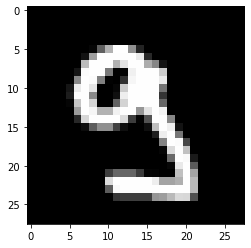

In [14]:
plt.imshow(x_test[13717],cmap='gray')

In [4]:
y_test_df[y_test_df.prediction!=y_test_df.label].groupby(['label','prediction']).index.count().reset_index().sort_values('index')

NameError: name 'y_test_df' is not defined

In [3]:
test_kaggle = pd.read_csv('test.csv')